In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def sinal(z):
    return 1 if z > 0.5 else 0

In [2]:
def calcular_erro(alpha, X, Y, A):
    erro = 0
    N = len(X)
    for n in range(N):
        p_chapeu = sigmoid(sum(alpha * (A[n]) ))
        if(1 - p_chapeu)<np.e**-12:
            erro -= np.e**-12
        else:
            erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))
    erro = erro/N
    return erro if erro > np.e**-12 else np.e**-12

In [5]:
def CLogDKPd(X, Y, alpha, eta,epochs,d):
    t=0
    E=[]
    N=len(X)
    A=np.dot(X,X.T)
    A=A**d
    for epoca in range(epochs):
        if t>= N:
            t=0
        ordem = t
        p_chapeu = sigmoid(sum(alpha * (A[ordem]) ))
        S = (p_chapeu-Y[ordem]) *(A[ordem])
        alpha = alpha - eta * S
        E.append(calcular_erro(alpha, X, Y, A))
        t +=1
    return alpha, E

In [6]:
data = pd.read_csv('Ex2_D.csv', header=None)
X = np.array(data.iloc[:, :-1].values)
Y = np.array(data.iloc[:, -1].values)
eta = 0.1
epochs = 2000
alpha = np.zeros(len(X))
d=2
alpha, E = CLogDKPd(X, Y, alpha, eta, epochs, d)
print(alpha)

[ 6.90702547 -5.03556118 -4.91297779  4.02503407]


In [7]:
A=np.dot(X,X.T)
A=A**d
for n in range(len(X)):
    p_chapeu = sigmoid(sum(alpha * (A[n]) ))
    print(p_chapeu)
    print(sinal(p_chapeu))
    


0.7278062164600037
1
0.11424847815962487
0
0.1570543467644276
0
0.9657155103313495
1


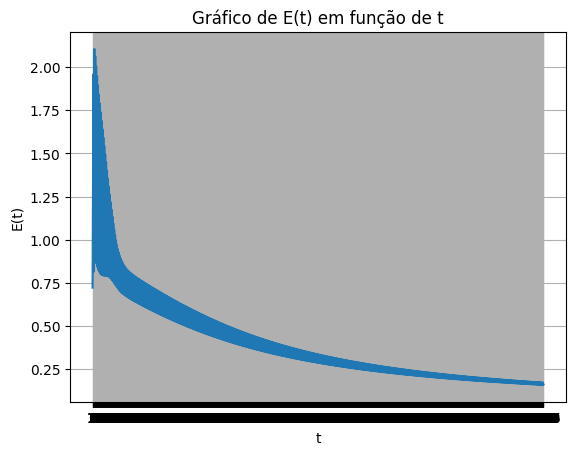

In [8]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()